In [23]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import scipy.stats as st

In [24]:
%store -r select_states_population_change_df
%store -r select_states_sales_df
%store -r select_states_total_population_df 

In [25]:

select_states_population_change_df = select_states_population_change_df.rename(columns={'STNAME': 'State'})
select_states_population_change_df

,State,CTYNAME,Popestimate Yearly Change 2011(%),Popestimate Yearly Change 2012(%),Popestimate Yearly Change 2013(%),Popestimate Yearly Change 2014(%),Popestimate Yearly Change 2015(%),Popestimate Yearly Change 2016(%),Popestimate Yearly Change 2017(%),Popestimate Yearly Change 2018(%),Popestimate Yearly Change 2019(%),Popestimate Yearly Change 2020(%),Popestimate 10-Year Change 2020(%)
0,District of Columbia,District of Columbia,1.024795,1.024903,1.024888,1.018485,1.020209,1.015601,1.013821,1.010139,1.005831,1.006443,1.177659
1,Utah,Utah,1.014190,1.013979,1.015636,1.013645,1.015417,1.020316,1.019479,1.016630,1.015286,1.014515,1.170953
2,Texas,Texas,1.015990,1.017103,1.015163,1.018257,1.018746,1.016220,1.013504,1.011790,1.012655,1.012901,1.163176
49,Illinois,Illinois,1.002121,1.001185,1.000990,0.999171,0.998020,0.997055,0.996739,0.995680,0.995468,0.993725,0.980296
50,West Virginia,West Virginia,1.001262,1.000452,0.998558,0.997736,0.996089,0.994088,0.992495,0.993000,0.994081,0.994165,0.962531


In [26]:

select_states_total_population_df.index.names = ["State"]
select_states_total_population_df 
sel_states_tot_pop_df = select_states_total_population_df.reset_index()
sel_states_tot_pop_df 

,State,CTYNAME,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,POPESTIMATE2013,POPESTIMATE2014,POPESTIMATE2015,POPESTIMATE2016,POPESTIMATE2017,POPESTIMATE2018,POPESTIMATE2019,POPESTIMATE2020
0,District of Columbia,District of Columbia,605282,620290,635737,651559,663603,677014,687576,697079,704147,708253,712816
1,Illinois,Illinois,12840545,12867783,12883029,12895778,12885092,12859585,12821709,12779893,12724685,12667017,12587530
2,Texas,Texas,25241897,25645504,26084120,26479646,26963092,27468531,27914064,28291024,28624564,28986794,29360759
3,Utah,Utah,2775413,2814797,2854146,2898773,2938327,2983626,3044241,3103540,3155153,3203383,3249879
4,West Virginia,West Virginia,1854265,1856606,1857446,1854768,1850569,1843332,1832435,1818683,1805953,1795263,1784787


In [27]:
select_states_sales_df.index.names = ["State"]
sel_states_sales_df = select_states_sales_df.reset_index()
sel_states_sales_df #main to work with

,State,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,IL,59779.0,59571,74902,93725,100689,113144,123797.0,123867,129384,122175,135944.0
1,TX,93241.0,94298,112232,134382,136227,144533,151306.0,154065,154210,158770,173511.0
2,UT,18356.0,19235,24019,27369,27877,33008,35399.0,34867,33972,34607,36991.0
3,VA,70839.0,65667,75558,87705,84784,95447,104942.0,111890,110752,115225,128283.0
4,WA,26889.0,27330,37158,46846,48530,57052,63002.0,65469,60361,58065,59939.0


In [28]:
#Change the name of the header 
select_states_population_yearly_change_df = select_states_population_change_df.rename(columns={
    'STNAME': 'State',
    'Popestimate Yearly Change 2011(%)': '2011',
    'Popestimate Yearly Change 2012(%)': '2012',
    'Popestimate Yearly Change 2013(%)': '2013',
    'Popestimate Yearly Change 2014(%)': '2014',
    'Popestimate Yearly Change 2015(%)': '2015',
    'Popestimate Yearly Change 2016(%)': '2016',
    'Popestimate Yearly Change 2017(%)': '2017',
    'Popestimate Yearly Change 2018(%)': '2018',
    'Popestimate Yearly Change 2019(%)': '2019',
    'Popestimate Yearly Change 2020(%)': '2020'
})

select_states_population_yearly_change_df.pop('CTYNAME')
sel_states_pop_ych_df = select_states_population_yearly_change_df
sel_states_pop_ych_df #main to work with

,State,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,Popestimate 10-Year Change 2020(%)
0,District of Columbia,1.024795,1.024903,1.024888,1.018485,1.020209,1.015601,1.013821,1.010139,1.005831,1.006443,1.177659
1,Utah,1.014190,1.013979,1.015636,1.013645,1.015417,1.020316,1.019479,1.016630,1.015286,1.014515,1.170953
2,Texas,1.015990,1.017103,1.015163,1.018257,1.018746,1.016220,1.013504,1.011790,1.012655,1.012901,1.163176
49,Illinois,1.002121,1.001185,1.000990,0.999171,0.998020,0.997055,0.996739,0.995680,0.995468,0.993725,0.980296
50,West Virginia,1.001262,1.000452,0.998558,0.997736,0.996089,0.994088,0.992495,0.993000,0.994081,0.994165,0.962531


In [29]:
#Change the name of the header 
sel_states_tot_pop_df = sel_states_tot_pop_df.rename(columns={
    'STNAME': 'State',
    'POPESTIMATE2010': '2010',
    'POPESTIMATE2011': '2011',
    'POPESTIMATE2012': '2012',
    'POPESTIMATE2013': '2013',
    'POPESTIMATE2014': '2014',
    'POPESTIMATE2015': '2015',
    'POPESTIMATE2016': '2016',
    'POPESTIMATE2017': '2017',
    'POPESTIMATE2018': '2018',
    'POPESTIMATE2019': '2019',
    'POPESTIMATE2020': '2020'
})

sel_states_tot_pop_df

,State,CTYNAME,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,District of Columbia,District of Columbia,605282,620290,635737,651559,663603,677014,687576,697079,704147,708253,712816
1,Illinois,Illinois,12840545,12867783,12883029,12895778,12885092,12859585,12821709,12779893,12724685,12667017,12587530
2,Texas,Texas,25241897,25645504,26084120,26479646,26963092,27468531,27914064,28291024,28624564,28986794,29360759
3,Utah,Utah,2775413,2814797,2854146,2898773,2938327,2983626,3044241,3103540,3155153,3203383,3249879
4,West Virginia,West Virginia,1854265,1856606,1857446,1854768,1850569,1843332,1832435,1818683,1805953,1795263,1784787


In [30]:
# Create a dictionary to rename the states
rename_dict = {'District of Columbia': 'WA', 'Utah': 'UT', 'Texas': 'TX', 'Illinois': 'IL', 'West Virginia': 'VA'}

In [38]:
# Rename the states
sel_states_tot_pop_df['State'] = sel_states_tot_pop_df['State'].replace(rename_dict)
sel_states_tot_pop_df = sel_states_tot_pop_df.drop('CTYNAME', axis=1)
sel_states_tot_pop_df  #main to work with

,State,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,WA,605282,620290,635737,651559,663603,677014,687576,697079,704147,708253,712816
1,IL,12840545,12867783,12883029,12895778,12885092,12859585,12821709,12779893,12724685,12667017,12587530
2,TX,25241897,25645504,26084120,26479646,26963092,27468531,27914064,28291024,28624564,28986794,29360759
3,UT,2775413,2814797,2854146,2898773,2938327,2983626,3044241,3103540,3155153,3203383,3249879
4,VA,1854265,1856606,1857446,1854768,1850569,1843332,1832435,1818683,1805953,1795263,1784787


In [39]:
%store sel_states_tot_pop_df

Stored 'sel_states_tot_pop_df' (DataFrame)


In [32]:
# Graphs 

In [ ]:
# Plot a line chart for each state
for state in tot_pop_df.columns:
    plt.plot(df.index, df[state], label=state)

# Set plot labels and legend
plt.xlabel('Year')
plt.ylabel('Population')
plt.legend(title='StateName')

# Display the plot
plt.show()

In [33]:
data = {
    'StateName': ['Washington', 'Utah'],
    '2010': [1000, 800],
    '2011': [1200, 900],
    '2012': [1500, 1100],
    '2013': [1300, 1000]
}

# Create a DataFrame from your data
df = pd.DataFrame(data)
df

,StateName,2010,2011,2012,2013
0,Washington,1000,1200,1500,1300
1,Utah,800,900,1100,1000


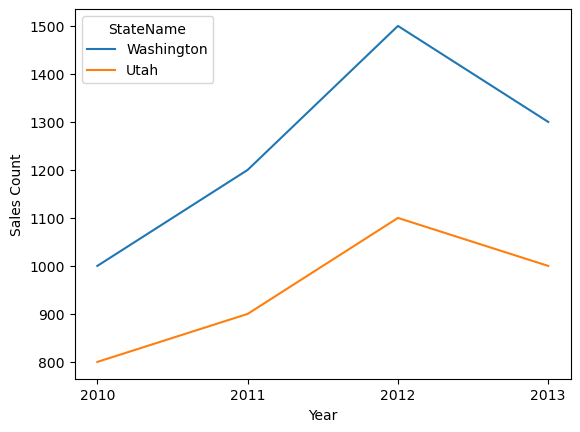

In [34]:
# Set 'StateName' as the index
df.set_index('StateName', inplace=True)

# Transpose the DataFrame to have years as rows
df = df.transpose()

# Plot a line chart for each state
for state in df.columns:
    plt.plot(df.index, df[state], label=state)

# Set plot labels and legend
plt.xlabel('Year')
plt.ylabel('Sales Count')
plt.legend(title='StateName')

# Display the plot
plt.show()